# Notebook to make Figure 5

In [ ]:
# Import necessary packages & set-up plotting aesthetics

import numpy as np 
import importlib
import json
import h5ify
import os
import tqdm
import imageio
from scipy.stats import pearsonr

import matplotlib
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
from matplotlib import style
style.use('../utils/plotting.mplstyle')
from matplotlib.lines import Line2D

import seaborn as sns
cp = sns.color_palette('muted')
cp2 = sns.color_palette('pastel')
cp3 = sns.color_palette('dark')

import sys
sys.path.append('../utils')
import plotting_functions as pf

# where data is saved
data_dir = '../data/different_total_masses/'

### Setup

Load data

In [1]:
# Load SNR vs JSD
JSD_and_SNR_dict = h5ify.load(data_dir+'JSDs_different_total_masses.h5'),

Setup plotting aesthetics

In [2]:
# Which total masses to plot
masses = [80, 100, 120, 270, 500]
masses_to_plot = [f'total mass {Mtot}' for Mtot in masses]

# Associated colors and labels
colors = [cp3[6], cp2[6],  'mediumpurple', cp3[0], cp2[0]]
labels = [fr'$M = {Mtot} \, M_\odot$' for Mtot in masses]

# Which cycles to plot
cycles_to_plot = ['-1.0', '0.0', '1.0', '1.5', '2.0']

### Make Figure

/local/simona.miller/ipykernel_2277929/3903169298.py:13: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(SNR, log10_JSD, c=c, label=l)
/local/simona.miller/ipykernel_2277929/3903169298.py:17: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  axin.scatter(SNR[mask], log10_JSD[mask], c=c)


PearsonRResult(statistic=0.9551083042240556, pvalue=1.1359796208319759e-29)


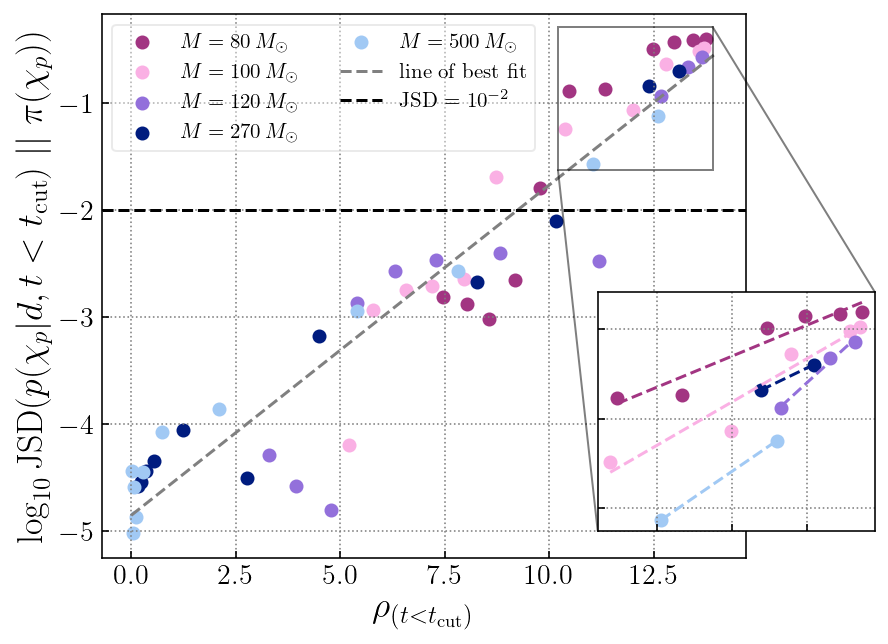

In [3]:
x_grid = np.linspace(0,14,100)

fig, ax = plt.subplots(1,1, figsize = (pf.DEFAULT_FIG_WIDTH/2, 5))

# inset axis
axin = ax.inset_axes([0.77, 0.05, 0.43, 0.44])

for m,c,l in zip(masses_to_plot,colors,labels):  

    log10_JSD = np.log10(JSD_and_SNR_dict[0][m]['pre-cutoff JSD'])
    SNR = JSD_and_SNR_dict[0][m]['pre-cutoff SNR']
    
    ax.scatter(SNR, log10_JSD, c=c, label=l)
    
    # also inset axis
    mask = log10_JSD > -1.6
    axin.scatter(SNR[mask], log10_JSD[mask], c=c)

    # Create the line of best fit
    m, b = np.polyfit(SNR[mask], log10_JSD[mask], 1)
    x_grid2 = np.linspace(min(SNR[mask]),max(SNR[mask]),10)
    axin.plot(x_grid2, m * x_grid2 + b, ls='--', color=c)
    

## line of best fit for all masses in log space
x = np.concatenate([JSD_and_SNR_dict[0][m]['pre-cutoff SNR'] for m in masses_to_plot])
y = np.concatenate([np.log10(JSD_and_SNR_dict[0][m]['pre-cutoff JSD']) for m in masses_to_plot])

m, b = np.polyfit(x, y, 1)

# Create the line of best fit
y_bestfit_grid = m * x_grid + b

print(pearsonr(x, y))

ax.plot(x_grid, y_bestfit_grid, ls='--', color='gray', label='line of best fit')

ax.axhline(-2, color='k', ls='--', label='JSD = $10^{-2}$')

ax.legend(ncols=2, fontsize=10.5, frameon=True, fancybox=True, framealpha=0.4)

ax.indicate_inset_zoom(axin, edgecolor="black")
axin.xaxis.set_ticklabels([])
axin.yaxis.set_ticklabels([])

ax.set_xlabel(r'$\rho_{(t<t_{\rm cut})} $')
ax.set_ylabel(r'$\log_{10}\mathrm{JSD}(p(\chi_p |d, t<t_\mathrm{cut})~||~ \pi(\chi_p))$')
plt.savefig('figure_05.png', dpi=300, bbox_inches='tight')
plt.show()